# STEP 1-3

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import preprocessing
from sklearn.cluster import KMeans

In the previous module we have prepared the data by imputing the mean for missing values, removing highly correlated features and removing features with very low variance. We will reuse our prepared dataset, by loading the data saved at the end of the previous module.

In [14]:
wine = pd.read_csv("winequality-red_3.csv") 

In Unsupervised Machine Learning we only use the features, to look for hidden patterns in the data. We do not have a target or `y`. We set the features to `X`. We can cluster the data based on certain features and try to see if the clusters make sense for quality afterwards. 

In [15]:
X = wine.drop(["quality"], axis = 1)

# STEP 4: Feature Engineering

Before clustering, we normalize our dataset. This means that we set the mean of every column to zero and calculate each value relative to this mean. By doing this, each columns has the same range of values, which makes it more suitable for comparison.

Let's apply normalization and see how the dataframe has changed. 

In [16]:
X.head()

,price,fixed acidity,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,12.032196,7.4,0.70,0.00,1.9,11.0,34.0,3.51,0.56,9.4
1,13.444977,7.8,0.88,0.00,2.6,25.0,67.0,3.20,0.68,9.8
2,12.520701,7.8,0.76,0.04,2.3,15.0,54.0,3.26,0.65,9.8
3,15.726190,11.2,0.28,0.56,1.9,17.0,60.0,3.16,0.58,9.8
4,11.829749,7.4,0.70,0.00,1.9,11.0,34.0,3.51,0.56,9.4


In [18]:
X_normalized=((X-X.min())/(X.max()-X.min()))

X_normalized.head()

,price,fixed acidity,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,0.348286,0.247788,0.397260,0.00,0.068493,0.140845,0.098940,0.606299,0.137725,0.153846
1,0.458652,0.283186,0.520548,0.00,0.116438,0.338028,0.215548,0.362205,0.209581,0.215385
2,0.386448,0.283186,0.438356,0.04,0.095890,0.197183,0.169611,0.409449,0.191617,0.215385
3,0.636859,0.584071,0.109589,0.56,0.068493,0.225352,0.190813,0.330709,0.149701,0.215385
4,0.332471,0.247788,0.397260,0.00,0.068493,0.140845,0.098940,0.606299,0.137725,0.153846


# STEP 5: Feature selection 
We allready selected our features! 

# STEP 6: Modelling

## 6.1 Selecting the number of clusters

When we use a k-means clustering technique, we should select the number of clusters beforehand. One way to do this is the elbow method. We want to look for the elbow, the point where the slope suddenly decreases. We plot 1 to 11 clusters by setting `range()` from 1 to 11. We calculate the clusters for each observation by `Kmeans()`and then determine the inertia `kmeans.inertia`, Inertia is the sum of squared error for each cluster. We `append()` the value to the `inertia = []` list. The smaller the inertia the denser the clusters. How to select the right number of clusters? A good cluster should have tight clusters, but not too many clusters. A simple rule of thumb is to find the elbow of the graph.


In [1]:
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_normalized)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)

plt.title('Elbow plot')
plt.xlabel('Number of clusters')
plt.ylabel('Intertia')

NameError: name 'KMeans' is not defined

Where do you think the elbow is? What is our optimal number of cluster? You can test the results later for different numbers of clusters later!

In [24]:
number_clusters = 4 ## REMOVE BEFORE USING ##

## 6.2 K-means clustering of the data

Here, we define our model by the function `KMeans()` and fit the model to our dataset `X_normalized`. 

In [25]:
kmeans = KMeans(n_clusters = number_clusters).fit(X_normalized)

Next, we are using the fitted model to determine the cluster for each row of our data set by `.predict()`. 

In [26]:
cluster_pred = kmeans.predict(X_normalized)

Finally, we add the cluster numbers to our (non-normalized) dataset. You can see a new colomn `cluster` that shows to which cluster the observation belongs based on our model. 

In [27]:
wine["cluster"] = cluster_pred
wine.head()

,price,fixed acidity,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,cluster
0,12.032196,7.4,0.70,0.00,1.9,11.0,34.0,3.51,0.56,9.4,0,3
1,13.444977,7.8,0.88,0.00,2.6,25.0,67.0,3.20,0.68,9.8,0,3
2,12.520701,7.8,0.76,0.04,2.3,15.0,54.0,3.26,0.65,9.8,0,3
3,15.726190,11.2,0.28,0.56,1.9,17.0,60.0,3.16,0.58,9.8,1,1
4,11.829749,7.4,0.70,0.00,1.9,11.0,34.0,3.51,0.56,9.4,0,3


# STEP 7: Reviewing results
## 7.1 Inspect centroids

To see whether the clusters make sense, we can compare the values of the centroids of the different clusters. Remember, we want to see that next to compactness, isolation is optimized. This means that the centroids have different locations. Because we normalized the dataset, the location can be between the 0 and 1. If one centroid is 0 and the other 1, than they have maximum distance. If one centroid is at 0.5 and the other at 0.51, they are fairly close and the clusters are highly likely to have overlap. Let's look at `kmean-cluster_centers`.

In [28]:
#returns the coordinates of the centers
pd.DataFrame(kmeans.cluster_centers_ , columns = X.columns)

,price,fixed acidity,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,0.623140,0.223337,0.242621,0.223196,0.099998,0.231886,0.122254,0.533512,0.210527,0.522663
1,0.522321,0.512184,0.192194,0.498768,0.117952,0.135266,0.083491,0.347788,0.239969,0.344581
2,0.405172,0.317455,0.280598,0.303650,0.150543,0.370983,0.297050,0.423748,0.193092,0.209625
3,0.410450,0.255525,0.362503,0.106858,0.091236,0.155296,0.104852,0.497349,0.158914,0.237449


## 7.2 Inspect clusters in pairs 
It is not possible to visualize the clusters with all features at once. However, we can inspect the combination of 2 different features and see if the clusters are showing in the data. We do this with the use of `plt.scatter()` by the input argument `c=cluster-pred` we tell that we would like to have different colours for the different clsuters. Inspect the clusters: do would you define them as a cluster when seeing them visually? Try different combinations of features!

Text(0.5,1,'Clustering of the wine')

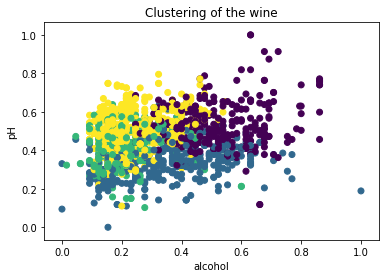

In [29]:
X_normalized.columns = X.columns

x_column = "alcohol" ## CHANGE VARIABLE ##
y_column = "pH"  ## CHANGE VARIABLE ##

plt.scatter(X_normalized[x_column], X_normalized[y_column], c=cluster_pred)
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title("Clustering of the wine")

## 7.3 Quality of the wine per cluster

We would like to inspect the difference in quality per cluster. Some clusters might have a better average quality than others. We can use this information to determine our recipe. In this case, 0 is the worst quality, 1 the best. The quality varies between 0 and 1. We are looking for the cluster that is closest to 1 and the cluster that is closest to 0, so we can compare the 2!

In [30]:
wine.groupby('cluster')['quality'].mean()

cluster
0    0.900344
1    0.700483
2    0.287834
3    0.369838
Name: quality, dtype: float64

## 7.4 The features of quality clusters

Let's analyze the difference between the cluster with the best (close to 1) and worst quality (closer to 0). We do this by locate (`.loc[]`) the observations in the dataset where clusters are equal to the cluster number of best and worst quality wine, e.g. `wine['cluster'] = 0`. Then we look at the mean value of these observation, to find our best recipe. We will use `.mean()` for this. 

In [32]:
## BEST QUALITY WINE ##

wine_best_quality = wine.loc[wine['cluster'] == 0] ## REMOVE BEFORE USING ##
wine_best_quality.mean()

price                   15.550579
fixed acidity            7.123711
volatile acidity         0.474227
citric acid              0.223196
residual sugar           2.359966
free sulfur dioxide     17.463918
total sulfur dioxide    40.597938
pH                       3.417560
sulphates                0.681581
alcohol                 11.797308
quality                  0.900344
cluster                  0.000000
dtype: float64

In [33]:
## WORST QUALITY WINE ##

wine_worst_quality = wine.loc[wine['cluster'] == 3] ## REMOVE BEFORE USING ##
wine_worst_quality.mean()

price                   12.827953
fixed acidity            7.487433
volatile acidity         0.649255
citric acid              0.106858
residual sugar           2.232047
free sulfur dioxide     12.026032
total sulfur dioxide    35.673250
pH                       3.371634
sulphates                0.595386
alcohol                  9.943417
quality                  0.369838
cluster                  3.000000
dtype: float64

Compare the different features of the worst and best quality wine. What are the most important differences between the high and low quality wine? 